# Notebook para el Asistente Virtual

### Elaborado por Alvaro Zambrana Sejas
### Universidad Mayor de San Simón
### 2024

Entrenamiento local con YOLO utilizando un dataset personalizado.

Requirements:
- Anaconda
- Python 3.10 

Configurar:
```
conda create -n copiloto-virtual python=3.10
conda activate copiloto-virtual
``` 

In [2]:
!python --version

Python 3.10.15


In [3]:
!nvidia-smi

Mon Dec  2 02:00:36 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.03                 Driver Version: 566.03         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   55C    P8             34W /  350W |    3631MiB /  24576MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Download repo and installing required packages

In [4]:
import os
%cd ..

HOME = os.getcwd()
parent_dir = os.path.dirname(HOME)
print(f'HOME: {HOME}')

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

C:\Users\Alvaro\PycharmProjects\copilotoVirtual
HOME: C:\Users\Alvaro\PycharmProjects\copilotoVirtual


C:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [1]:
!pip install ultralytics==8.2.103

  Using cached ultralytics-8.2.103-py3-none-any.whl.metadata (39 kB)
Using cached ultralytics-8.2.103-py3-none-any.whl (875 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install huggingface_hub


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!yolo -version

8.2.103


### Downloading pretrained weights

# Inferencia utilizando el model de YOLO pre-entrenado

In [12]:
!cd {HOME}
!yolo task=detect mode=predict conf=0.25 save=True model={HOME}/weights/yolov8n.pt source=".\\dataset\\yolo_signals_cbba_with_augmented_data\\test\\images\\2024_09_08_17_28_09_150_-0400_1280x1280.right-region.jpg"

Ultralytics YOLOv8.2.103 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba_with_augmented_data\test\images\2024_09_08_17_28_09_150_-0400_1280x1280.right-region.jpg: 640x640 1 person, 2 cars, 1 bus, 2 trucks, 10.0ms
Speed: 5.0ms preprocess, 10.0ms inference, 131.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict9
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


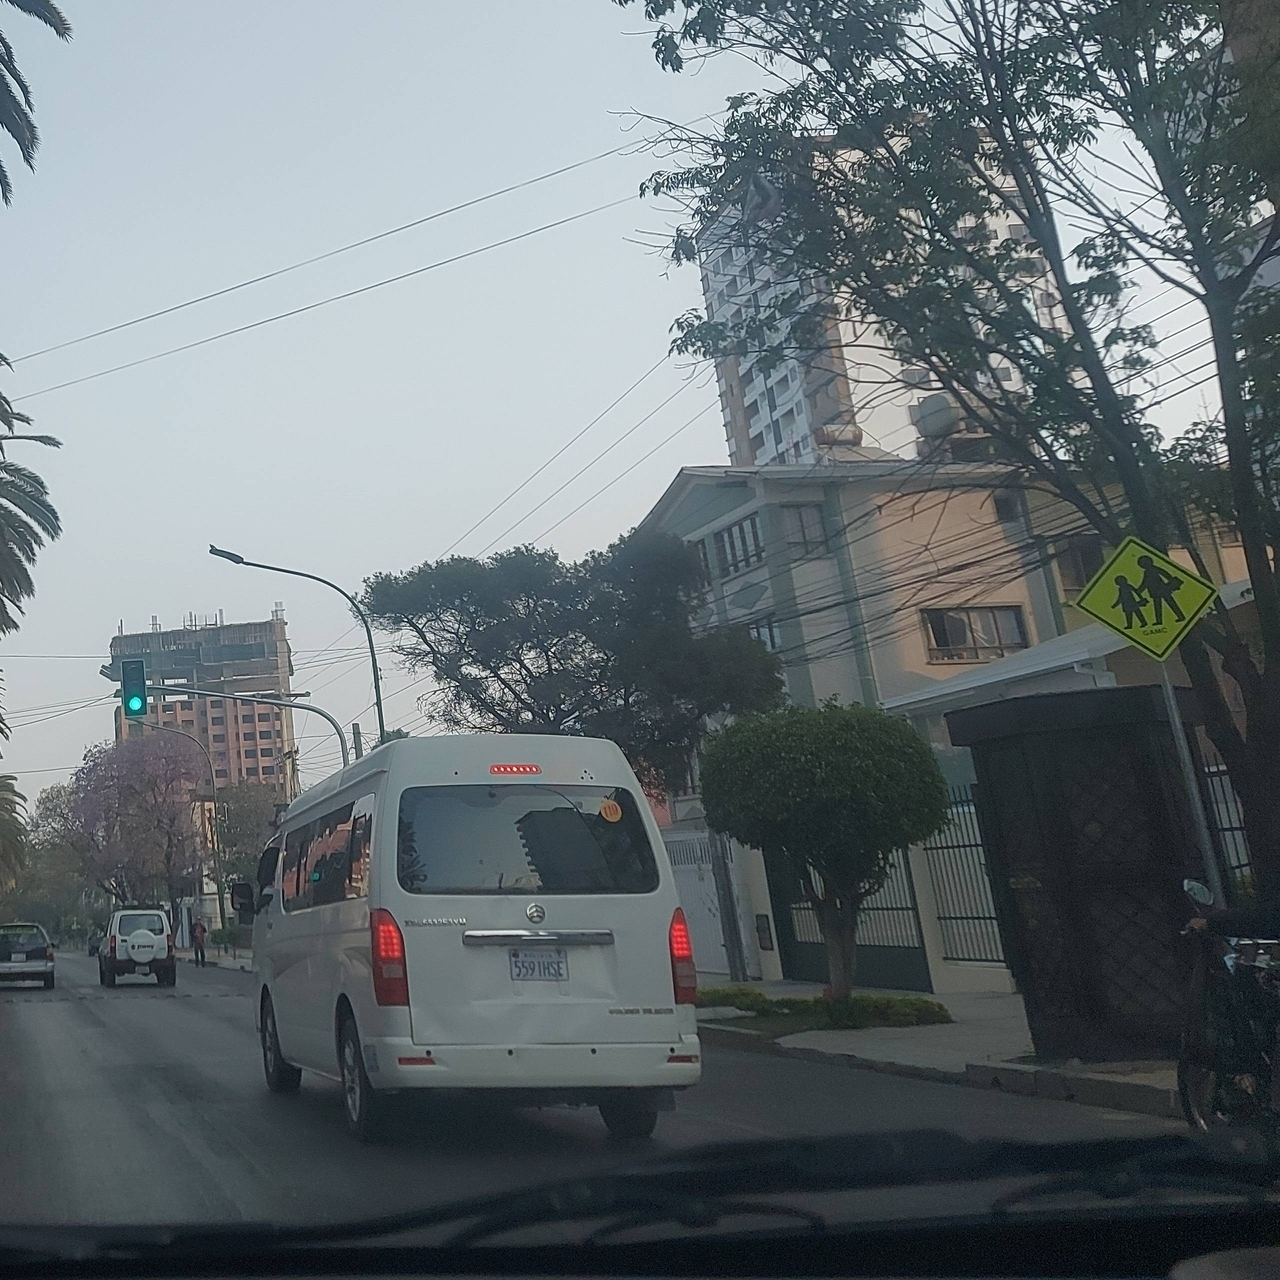

In [13]:
from IPython.display import Image

Image(filename=f".\\dataset\\yolo_signals_cbba_with_augmented_data\\test\\images\\2024_09_08_17_28_09_150_-0400_1280x1280.right-region.jpg", height=640)

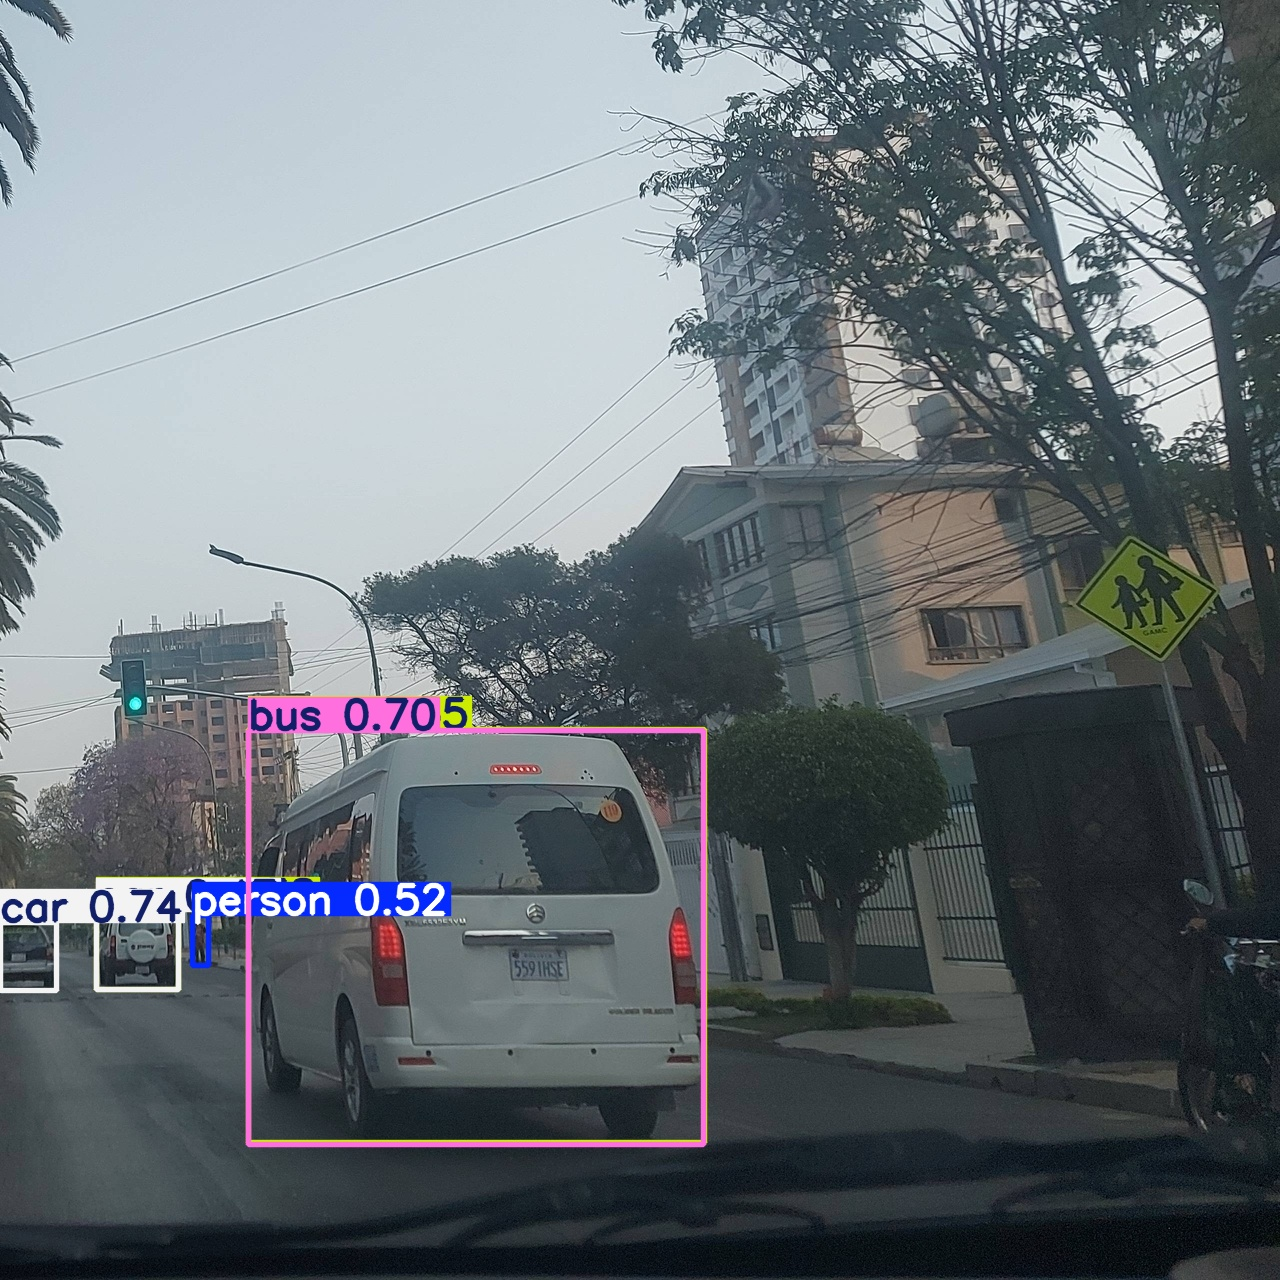

In [14]:
from IPython.display import Image

# Display the detected image
Image(filename=f".\\runs\\detect\\predict9\\2024_09_08_17_28_09_150_-0400_1280x1280.right-region.jpg", height=640)

# Train Custom Model

In [15]:
import torch
print(torch.cuda.is_available())

True


In [16]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Wed_Aug_14_10:26:51_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.6, V12.6.68
Build cuda_12.6.r12.6/compiler.34714021_0


In [17]:
torch.version.cuda

'12.4'

In [18]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.2.103  Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
Setup complete  (12 CPUs, 31.9 GB RAM, 945.3/953.0 GB disk)


In [13]:
!pip install albumentations==1.4

  Using cached albumentations-1.4.0-py3-none-any.whl.metadata (35 kB)
Using cached albumentations-1.4.0-py3-none-any.whl (123 kB)
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.17
    Uninstalling albumentations-1.4.17:
      Successfully uninstalled albumentations-1.4.17


In [21]:
# Set YOLO to quiet mode
os.environ['YOLO_VERBOSE'] = 'True'
os.environ['NO_ALBUMENTATIONS_UPDATE'] = '1'

%cd {HOME}

!yolo task=detect mode=train epochs=300 batch=16 plots=True model='./weights/yolov8n.pt' data="./dataset/yolo_signals_cbba_with_augmented_data/data.yaml" device=0



C:\Users\Alvaro\PycharmProjects\copilotoVirtual
New https://pypi.org/project/ultralytics/8.3.37 available ðŸ˜ƒ Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
engine\trainer: task=detect, mode=train, model=./weights/yolov8n.pt, data=./dataset/yolo_signals_cbba_with_augmented_data/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train23, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visual

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)


    207/300      2.19G     0.5213     0.3206     0.8153         14        640:  82%|########2 | 42/51 [00:06<00:01,  6.61it/s]
    207/300      2.19G     0.5213     0.3206     0.8153         14        640:  84%|########4 | 43/51 [00:06<00:01,  6.72it/s]
    207/300      2.19G      0.519     0.3195     0.8141         21        640:  84%|########4 | 43/51 [00:06<00:01,  6.72it/s]
    207/300      2.19G      0.519     0.3195     0.8141         21        640:  86%|########6 | 44/51 [00:06<00:01,  6.81it/s]
    207/300      2.19G     0.5188      0.319     0.8144         22        640:  86%|########6 | 44/51 [00:06<00:01,  6.81it/s]
    207/300      2.19G     0.5188      0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
                   all        235        259      0.945      0.847      0.954      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
                   all        235        259      0.857      0.897      0.928      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
                   all        235        259      0.887      0.897       0.92      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
                   all        235        259      0.828      0.924      0.918      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
                   all        235        259      0.948       0.85      0.935      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
                   all        235        259       0.87       0.93      0.949     


    248/300      2.19G     0.4766     0.2962     0.8031         20        640:  24%|##3       | 12/51 [00:01<00:05,  7.18it/s]
    248/300      2.19G     0.4766     0.2962     0.8031         20        640:  25%|##5       | 13/51 [00:01<00:05,  7.14it/s]
    248/300      2.19G     0.4712     0.2936     0.8079         24        640:  25%|##5       | 13/51 [00:02<00:05,  7.14it/s]
    248/300      2.19G     0.4712     0.2936     0.8079         24        640:  27%|##7       | 14/51 [00:02<00:05,  6.65it/s]
    248/300      2.19G     0.4664      0.292     0.8066         24        640:  27%|##7       | 14/51 [00:02<00:05,  6.65it/s]
    248/300      2.19G     0.4664      0.292     0.8066         24        640:  29%|##9       | 15/51 [00:02<00:05,  7.01it/s]
    248/300      2.19G     0.4687     0.2924     0.8052         34        640:  29%|##9       | 15/51 [00:02<00:05,  7.01it/s]
    248/300      2.19G     0.4687     0.2924     0.8052         34        640:  31%|###1      | 16/51 [00:02<0

# Inference

In [11]:
!yolo task=detect mode=predict conf=0.25 imgsz=1280 save=True show=True model=./runs/detect/train23/weights/best.pt source=C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba_with_augmented_data\test\images\ 

WARNING âš ï¸� Environment does not support cv2.imshow() or PIL Image.show()
OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'

Ultralytics YOLOv8.2.103 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

image 1/116 C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba_with_augmented_data\test\images\2024_08_18_17_40_52_601_-0400_1280x1280.left-region.jpg: 1280x1280 1 zona-escolar, 9.0ms
image 2/116 C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba_with_augmented_data\test\images\2024_09_08_17_08_58_138_-0400_1280x1280.left-region.jpg: 12

In [23]:
!yolo task=detect mode=predict conf=0.25 save=True model=./runs/detect/train23/weights/best.pt source=C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\external\Screenshot_2024-10-04_001459.png

Ultralytics YOLOv8.2.103 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\external\Screenshot_2024-10-04_001459.png: 416x640 1 prohibido-girar-izquierda, 59.6ms
Speed: 4.0ms preprocess, 59.6ms inference, 94.2ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict11
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


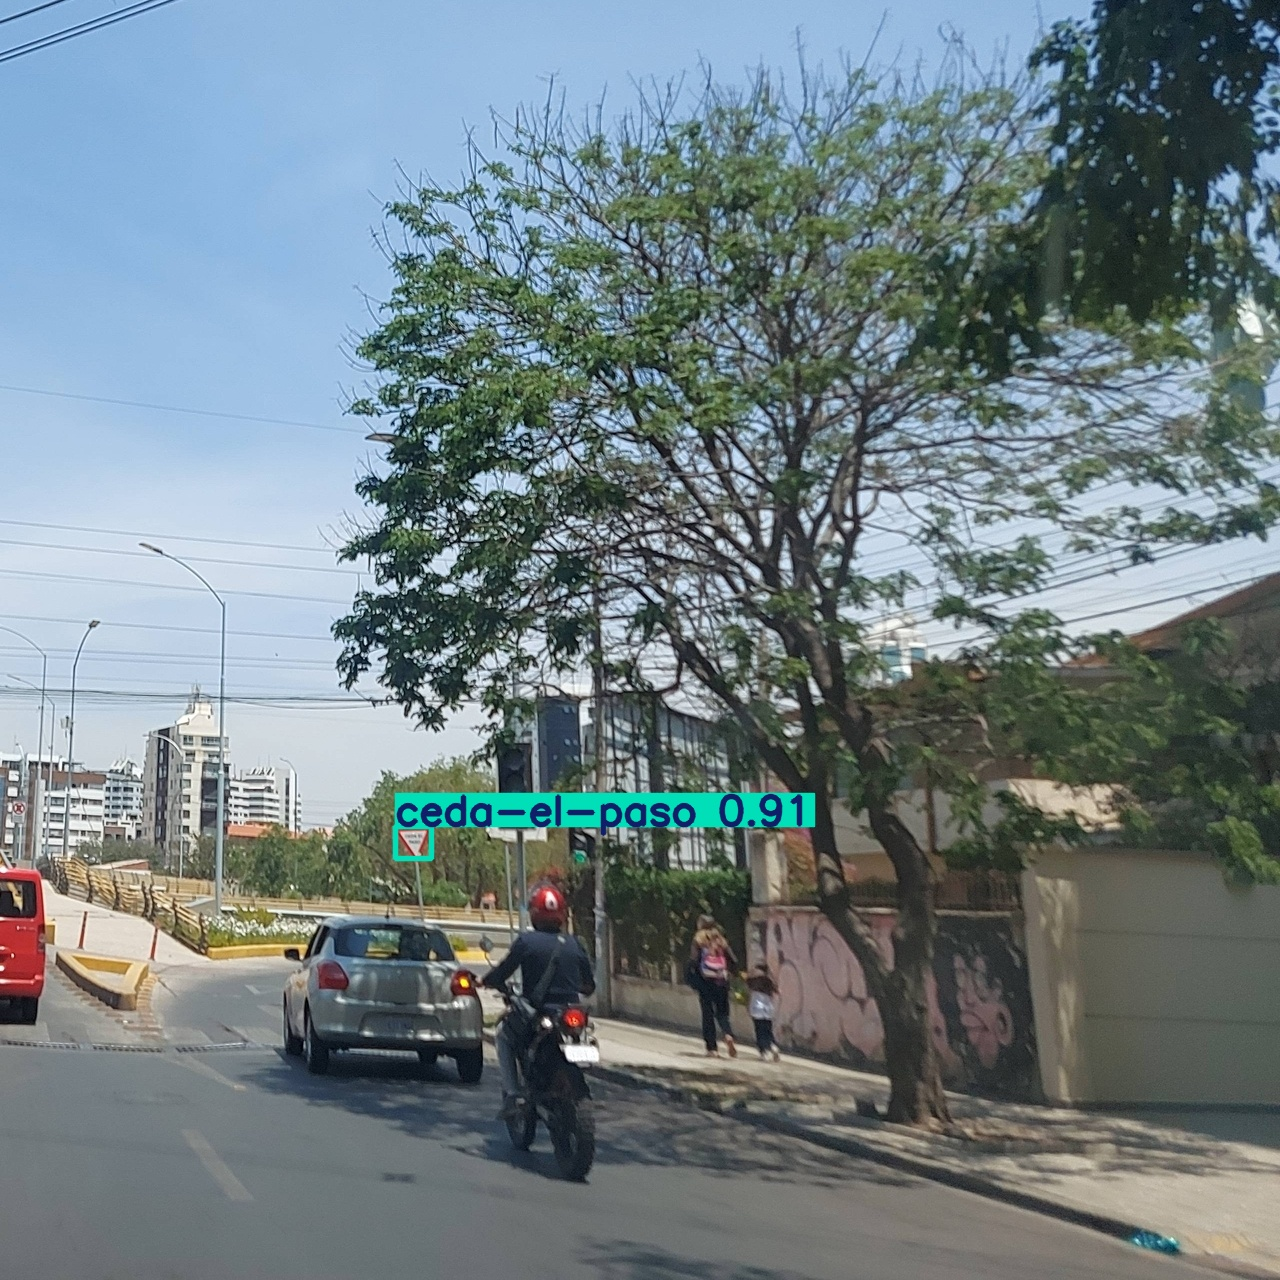

In [24]:
from IPython.display import Image
Image(filename=f"{HOME}\\runs\\detect\\predict10\\2024_10_01_12_40_45_425_-0400_1280x1280.right-region.jpg", height=600)

## Matrices de Confusión

C:\Users\Alvaro\PycharmProjects\copilotoVirtual


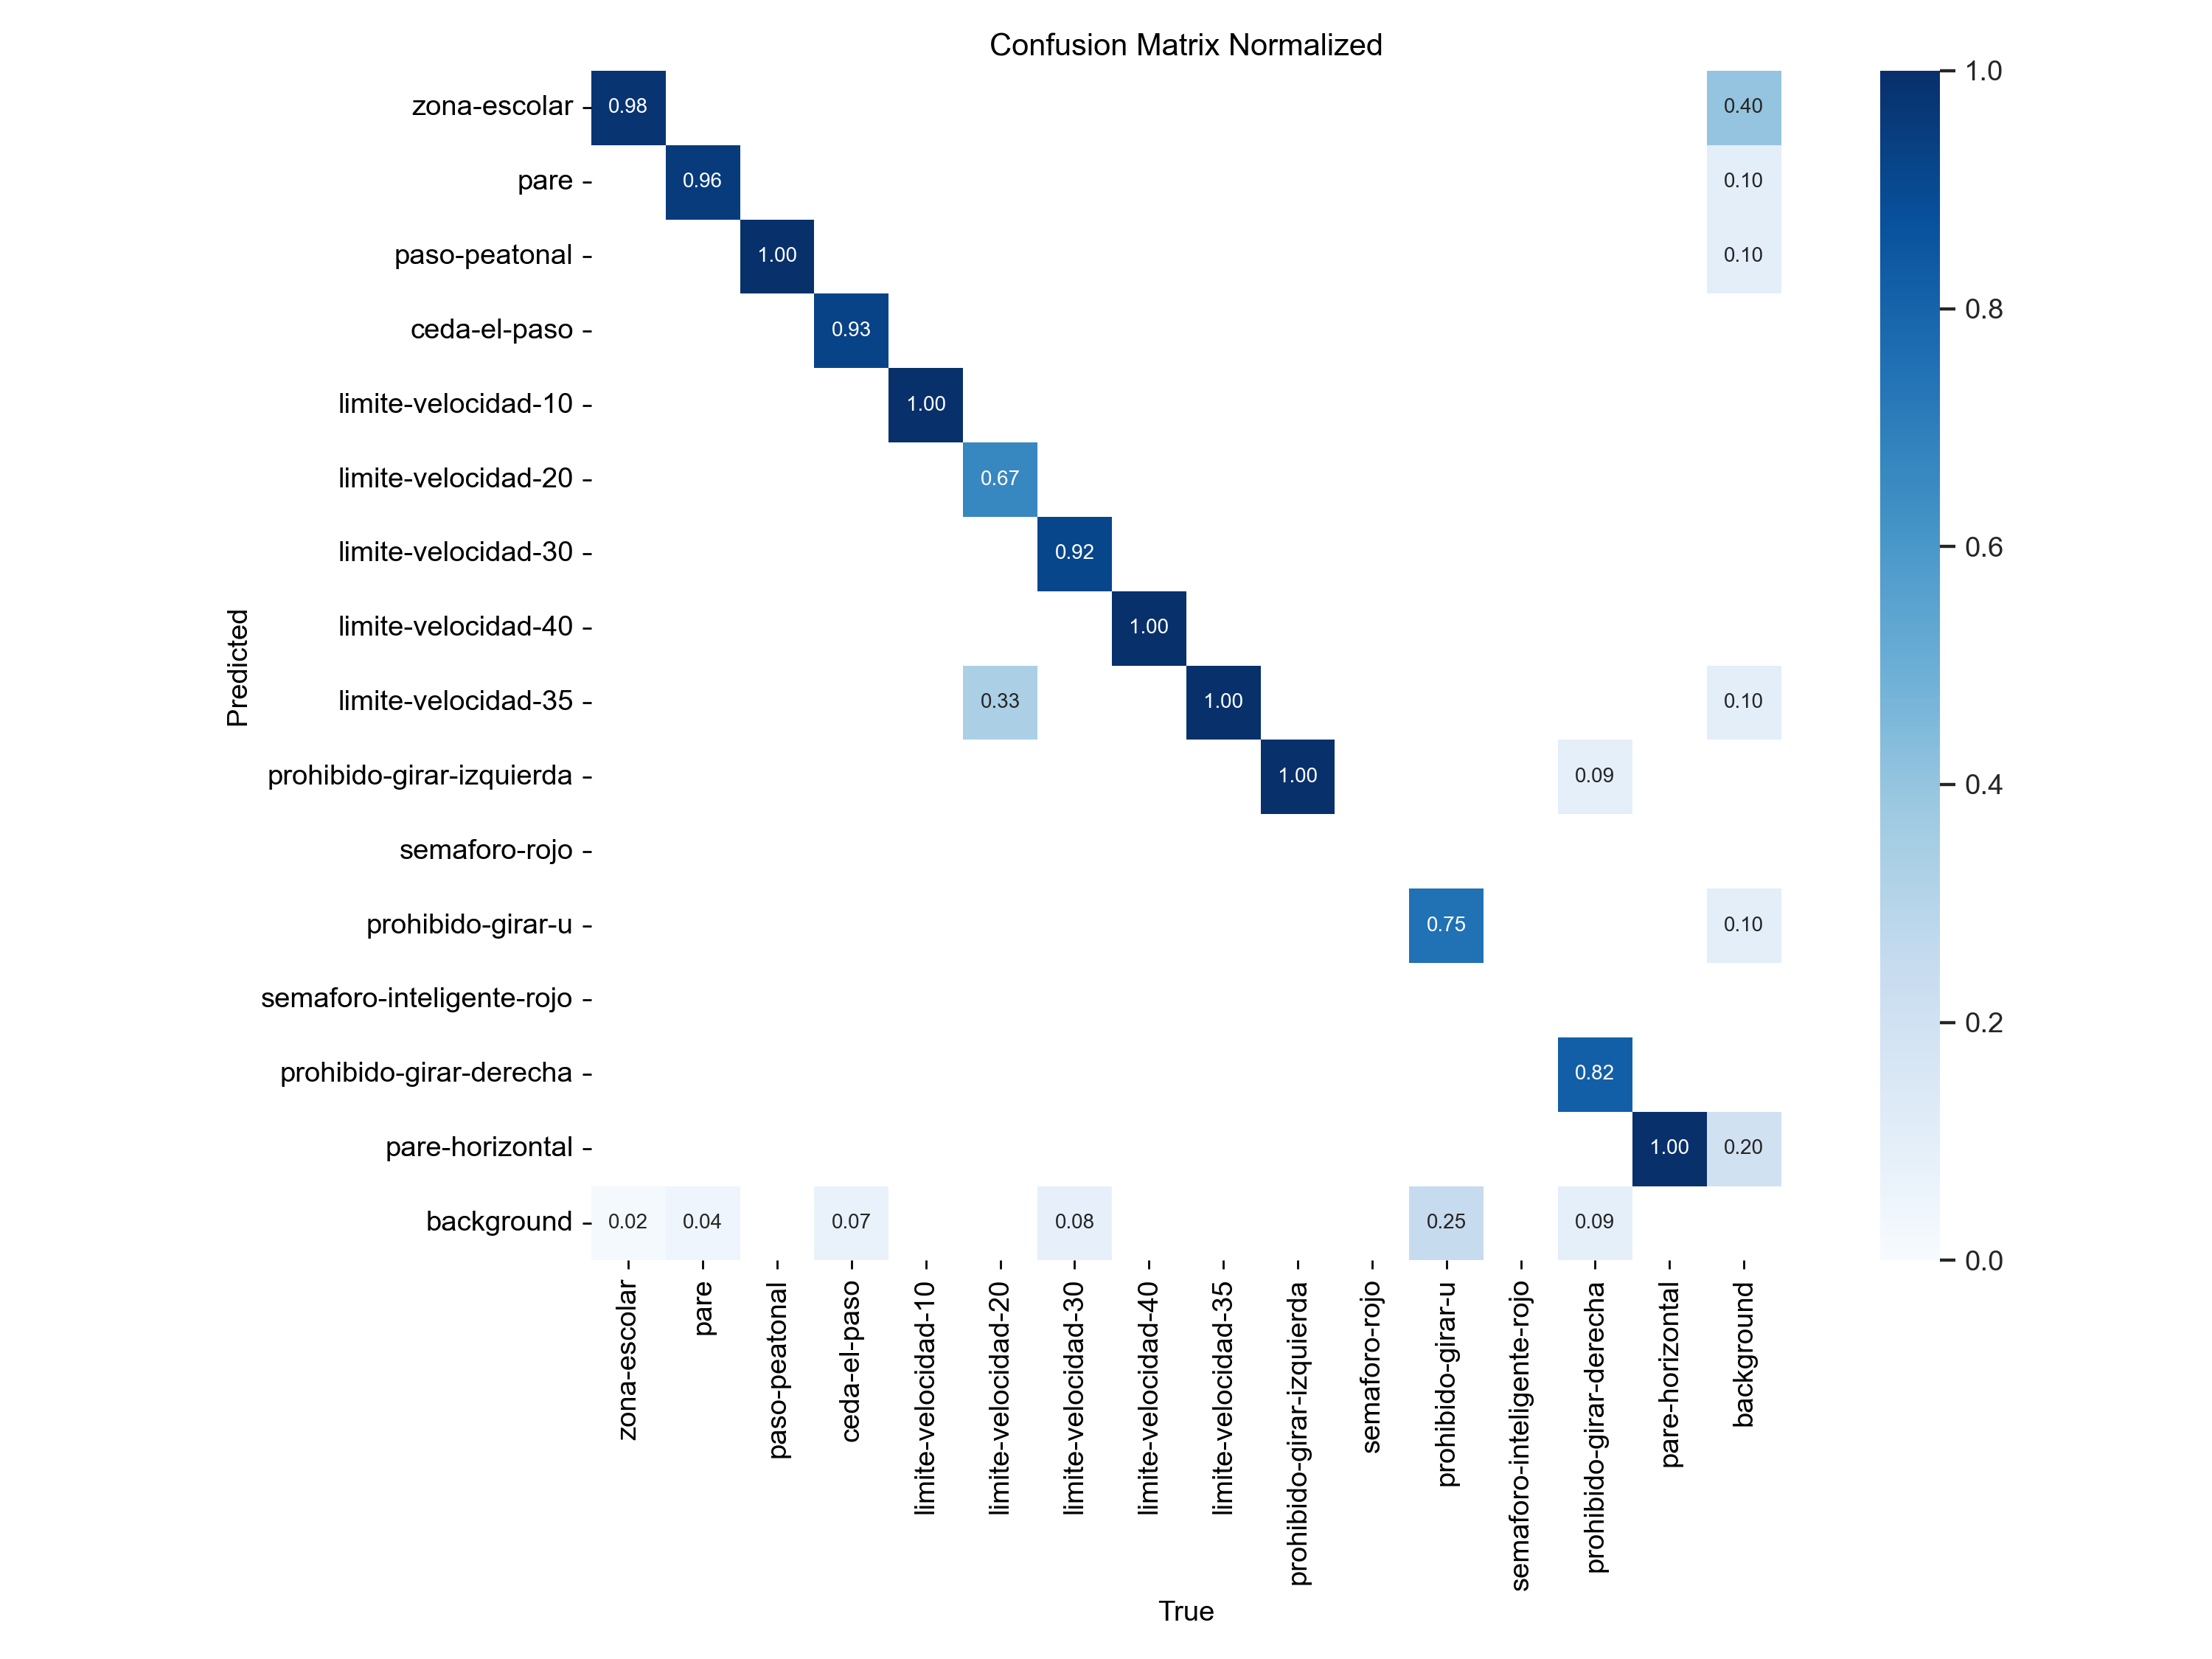

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train23/confusion_matrix_normalized.png', width=600)


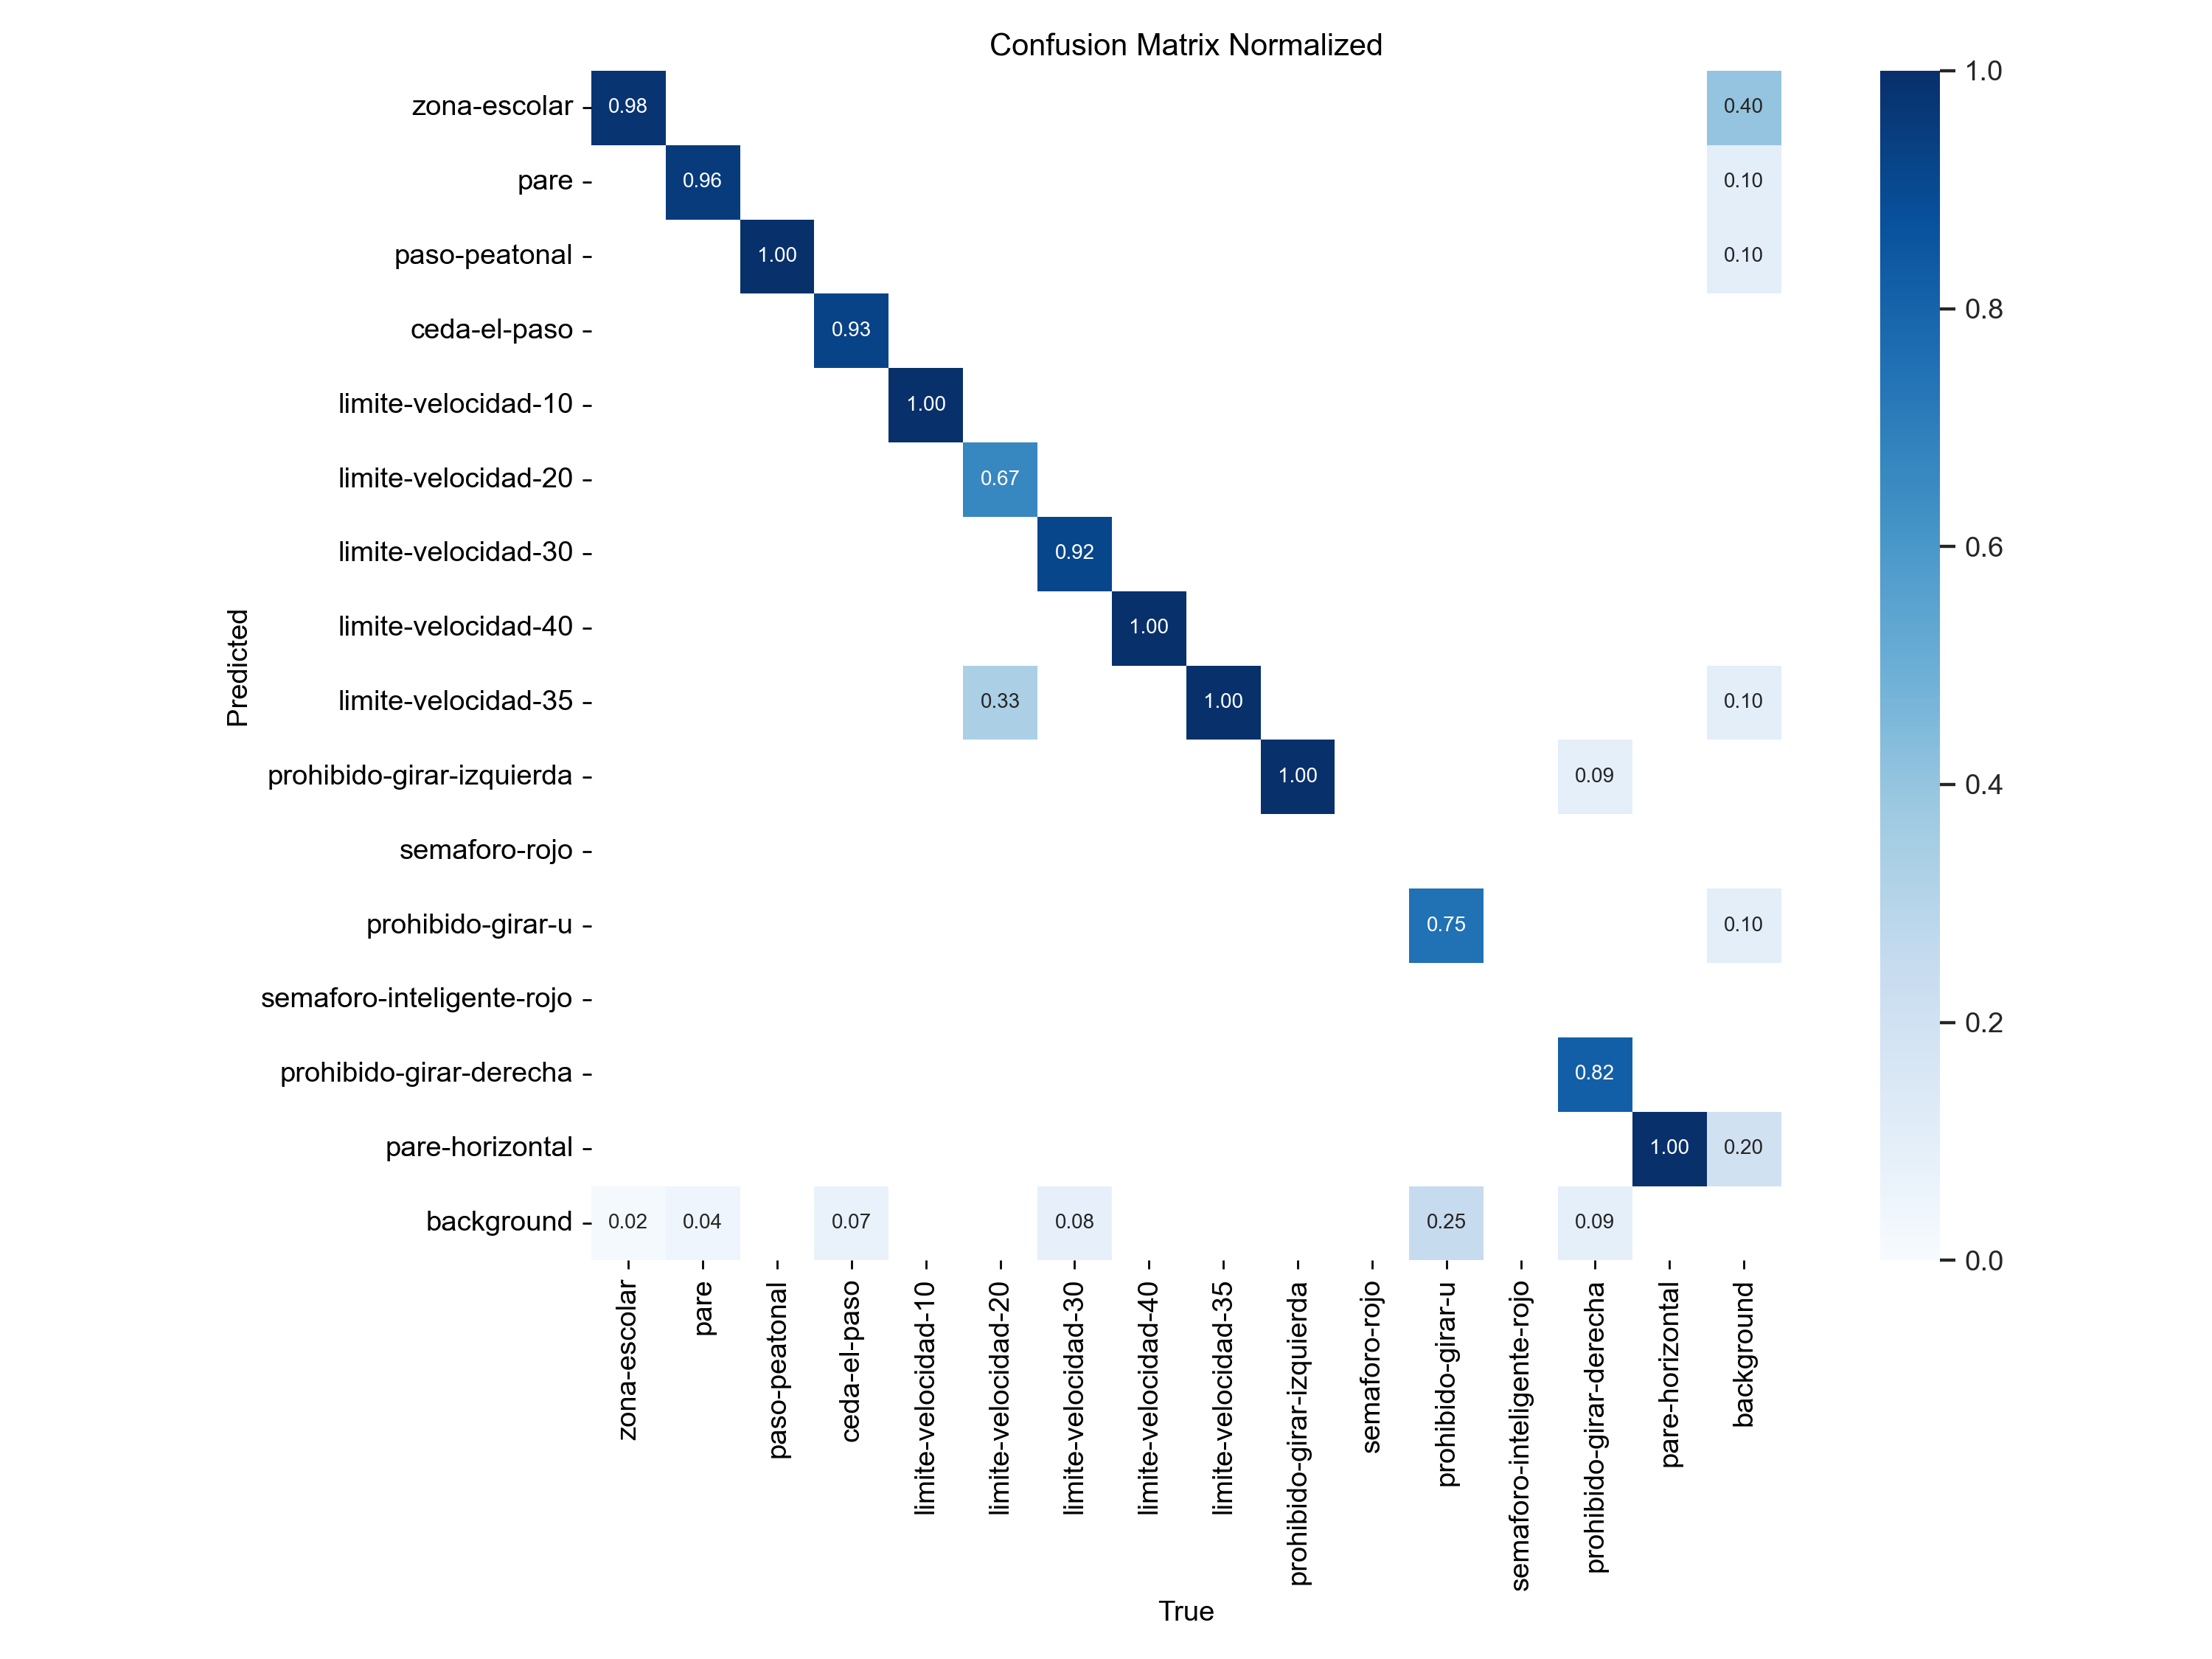

In [26]:
Image(filename=f'{HOME}/runs/detect/train23/confusion_matrix_normalized.png', width=600)


## Exportar modelo

In [27]:
!yolo export model='../runs/detect/train23/weights/best.pt' format=tflite imgsz=640

Ultralytics YOLOv8.2.103 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CPU (Intel Core(TM) i7-8700 3.20GHz)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'weights\..\runs\detect\train23\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 19, 8400) (6.0 MB)
requirements: Ultralytics requirement ['tensorflow-cpu>=2.0.0'] not found, attempting AutoUpdate...


In [8]:
#  Export model to tflite

from ultralytics import YOLO

# Load a model
model = YOLO(f'yolo_cbba.pt')  # load a custom trained model
# model.save('yolo_cbba.pt')

# model.export(format="onnx")
# Export the model

# model.save_pretrained(f'{HOME}/runs/detect/train20/weights/best')

model.export(format='tflite')

c:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cp

FileNotFoundError: [Errno 2] No such file or directory: 'yolo_cbba.pt'